In [ ]:
# Last time, using networkx package to draw graphs 

In [2]:
import networkx as nx # for drawing graphs
import numpy as np # for arrays

In [3]:
G = nx.Graph(np.array([[0,1],[1,0]])) # create a graph given by adjacency matrix

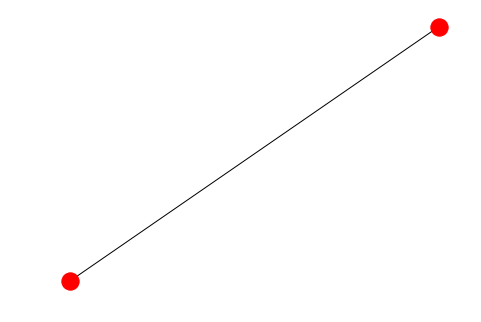

In [5]:
nx.draw(G) # WARNING: sometimes you have to run this command twice to get it to produce picture

In [93]:
A = np.array([[0, 1, 0, 1],[1, 0, 1, 1],[0, 1, 0, 0],[1, 1, 0, 0]]) # adjacency matrix
# adjacency matrix should be symmetric A[i,j] = A[j,i] (since graph is undirected)
H = nx.Graph(A)

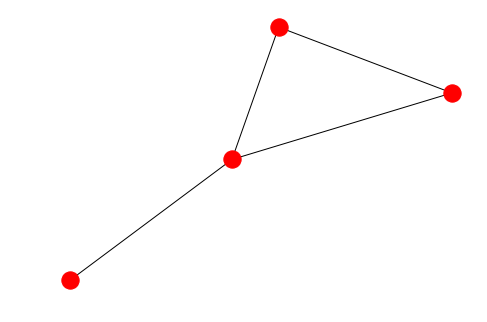

In [9]:
nx.draw(H)

In [14]:
# Is vertex 0 connected to vertex 2?
A[0,2]

0

In [15]:
A[2,0]

0

In [16]:
# Many different ways of representing graphs computationally 
# Adjacency matrix is less efficient if graph is sparse (many vertices, few edges)

In [94]:
##############

In [ ]:
# Random walks on graphs

In [18]:
def rand_walk_graph(A,v,num_steps):
    """Do random walk graph given by adjacency matrix (numpy array).
    Start at vertex v, go num_steps number of steps.
    Return ending vertex w."""
    w = v # current vertex; start at v
    num_verts = len(A)
    
    for n in range(num_steps):
        # first find list of the neighbors of w
        neigh_list = [i for i in range(num_verts) if A[w][i]==1]
        # choose one of the neighbors of w randomly; update w
        w = neigh_list[randint(0,len(neigh_list)-1)]
    return w 

In [26]:
rand_walk_graph(A,0,8) 

0

In [ ]:
# Q: What is the distribution of end points when do a random walk with large
# number of steps, starting at a fixed vertex v?

In [28]:
[rand_walk_graph(A,0,100) for n in range(10)]

[1, 1, 1, 2, 0, 1, 3, 1, 3, 3]

In [29]:
# plot this information on histogram 
import matplotlib.pyplot as plt

(array([250.,   0.,   0., 382.,   0.,   0., 143.,   0.,   0., 225.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

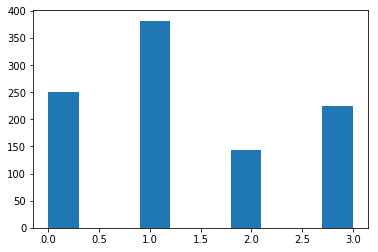

In [30]:
plt.hist([rand_walk_graph(A,0,100) for n in range(1000)])

(array([ 732.,    0.,    0., 1132.,    0.,    0.,  345.,    0.,    0.,
         791.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

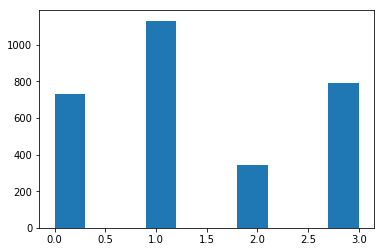

In [32]:
plt.hist([rand_walk_graph(A,0,50) for n in range(3000)])

In [ ]:
# Above suggests that prob of landing at w is proportional to 
# number of edges emanating from w (aka degree(w))

In [ ]:
# (False) Conjecture: For any connected graph the likelihood of landing at some w
# after a large number of random walk steps is nearly proportional
# to degree of w. 

In [ ]:
# Definition: A graph is connected if there is a path between any two vertices 

In [95]:
# Conjecture above is not true, below is a counterexample

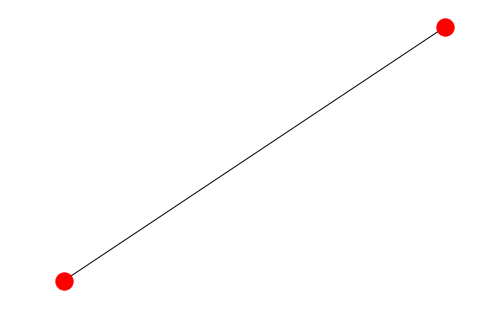

In [37]:
A2 = np.array([[0,1],[1,0]])
nx.draw(nx.Graph(A2))

(array([  0.,   0.,   0.,   0.,   0., 500.,   0.,   0.,   0.,   0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <a list of 10 Patch objects>)

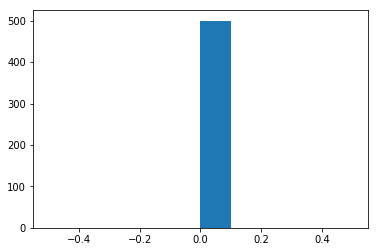

In [43]:
plt.hist([rand_walk_graph(A2,0,56) for n in range(500)])
# always ends up at 0 if num_steps is even

In [ ]:
# Theorem: For any connected, non-bipartite graph the likelihood of landing at some w
# after a large number of random walk steps is nearly proportional
# degree of w 
# Bipartite: The vertices fall in two classes, 
# with no edges connecting vertices of the same class

In [ ]:
# Applies to many situations: e.g. card shuffling (vertices=possible orderings of cards,
# edges = pairs of vertices that can be obtained from one another by one shuffle)

In [ ]:
###################

In [ ]:
# Now: random graphs 

In [46]:
# Fixed edges model: control the number of vertices and number of edges 
import numpy as np 

def rand_graph(num_v, num_e):
    """Returns a random graph with num_v vertices and num_e edges. 
    Represented as an numpy array giving the adjacency matrix.
    Pick two distinct vertices randomly, add an edge between if there isn't one already.
    Repeat this process until we have num_e edges."""
    A = np.zeros((num_v,num_v)) # adjacency matrix, start off all zeros
    e_so_far = 0 # number of edges added so far
    while e_so_far < num_e:
        # Choose two vertices randomly
        i = randint(0,num_v-1)
        j = randint(0,num_v-1)
        if i!=j and A[i,j]==0:  # tests whether i,j are different, and no edge yet
            A[i,j]=1  # add edge
            A[j,i]=1
            e_so_far += 1
    # note: above loop would be infinite if num_e is greater than number of pairs of
    # distinct vertices
    return A


In [47]:
rand_graph(7,8)

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 1.],
       [0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 1.],
       [0., 1., 1., 1., 0., 1., 0.]])

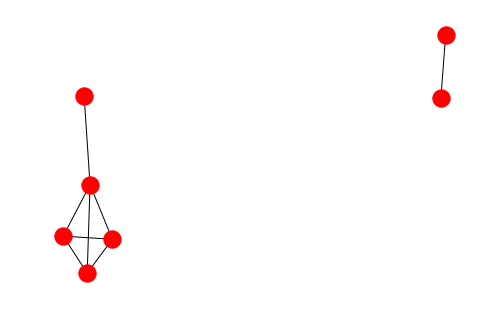

In [86]:
nx.draw(nx.Graph(rand_graph(7,8)))

In [ ]:
# What is the maximum number of edges for a graph on n vertices? 
# equal to number of ways of choosing two distinct vertices 
# = n(n-1)/2

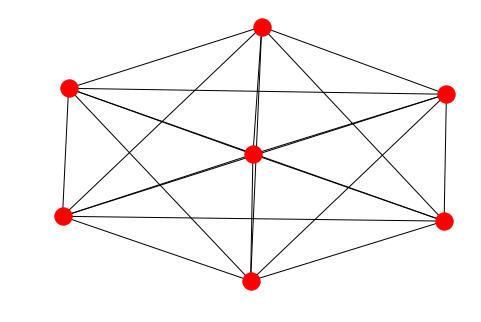

In [91]:
nx.draw(nx.Graph(rand_graph(7,21)))

In [92]:
nx.draw(nx.Graph(rand_graph(7,22)))
# goes into infinite loop 

KeyboardInterrupt: 